In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admission-regression/Admission_Predict.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admission-regression/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.shape

(400, 9)

In [13]:
df.duplicated().sum()

0

In [15]:
df.drop(columns=['Serial No.'],inplace=True)

In [17]:
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
387,307,105,2,2.0,3.5,8.1,0,0.53


In [18]:
#O/p column:- Chance of admit

#We have to bring all the i/p on the same scale before training the neural network

#we will do min max scaling to do so. (since we have upper bound and lower bound)

In [23]:
X=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()

In [28]:
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

In [29]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [31]:
X_test_scaled

array([[0.44      , 0.34615385, 0.5       , 0.625     , 0.75      ,
        0.65562914, 0.        ],
       [0.2       , 0.23076923, 0.5       , 0.25      , 0.5       ,
        0.61589404, 1.        ],
       [0.68      , 0.69230769, 0.75      , 0.75      , 0.625     ,
        0.65231788, 1.        ],
       [0.68      , 0.5       , 1.        , 0.625     , 0.75      ,
        0.61589404, 1.        ],
       [0.64      , 0.61538462, 0.75      , 0.75      , 1.        ,
        0.77152318, 1.        ],
       [0.36      , 0.46153846, 0.5       , 0.5       , 0.5       ,
        0.47682119, 0.        ],
       [0.4       , 0.46153846, 0.25      , 0.625     , 0.375     ,
        0.50662252, 0.        ],
       [0.2       , 0.30769231, 0.25      , 0.125     , 0.25      ,
        0.35430464, 0.        ],
       [0.4       , 0.19230769, 0.25      , 0.125     , 0.25      ,
        0.16556291, 0.        ],
       [1.        , 0.69230769, 0.75      , 1.        , 0.875     ,
        0.94701987, 1. 

In [32]:
#Now we have Scaled the values and are ready to create and train the neural network

In [33]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [43]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3196 - val_loss: 0.2878
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2555 - val_loss: 0.2217
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1856 - val_loss: 0.1642
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - val_loss: 0.1165
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1018 - val_loss: 0.0804
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - val_loss: 0.0559
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492 - val_loss: 0.0419
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - val_loss: 0.0343
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0376 - val_loss: 0.0297
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - val_loss: 0.0254
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0293 - val_loss: 0.0210
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - val_loss: 0.0172


In [44]:
y_pred=model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [45]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6885539512569155

In [46]:
#Plotting Training loss and validation loss

In [47]:
import matplotlib.pyplot as plt

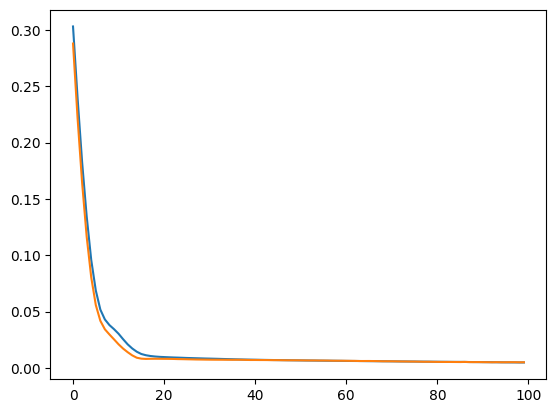

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])